# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating a template query URL to request information from the API
api_call = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
# Cities_data will be a list of dictionaries which will contain
# the information gathered from the API calls
cities_data = []

In [4]:
print('Data retrieval: started\n------------------------')

# Rec_counter will keep track of how many cities were successfully
# queried from the OpenWeatherMap API.
# Set_counter will simply keep track of how many sets of 50 cities
# we gathered
rec_counter = 0
set_counter = 1

# Loop that will fo through every city in our cities array
for city in cities:
    
    # Asking the API for information from the city
    resp = req.get(api_call + city).json()
    
    # Response code 200 OK means we can gather information from response
    if resp['cod'] == 200:
        print("Processing record", rec_counter % 50, "of set", set_counter, ':', city)
        
        # Get information from response and append it to list as a dictionary
        cities_data.append({
            "City" : resp["name"],
            "Country" : resp["sys"]["country"],
            "Lat" : resp["coord"]["lat"],
            "Lng" : resp["coord"]["lon"],
            "Max Temp" : resp["main"]["temp_max"],
            "Humidity" : resp["main"]["humidity"],
            "Wind Speed" : resp["wind"]["speed"],
            "Cloudiness" : resp["clouds"]["all"],
            "Date" : resp["dt"]
        })
        
        rec_counter += 1
        if not rec_counter % 50:
            set_counter += 1
    else: # Any response other than 200 is useless for us
        print("City not found. Skipping:", city)
        
print('------------------------\nData retrieval: finished\n------------------------')

Data retrieval: started
------------------------
City not found. Skipping: taolanaro
Processing record 0 of set 1 : bredasdorp
Processing record 1 of set 1 : cape town
Processing record 2 of set 1 : camacha
Processing record 3 of set 1 : atuona
Processing record 4 of set 1 : tupik
Processing record 5 of set 1 : hermanus
Processing record 6 of set 1 : hilo
Processing record 7 of set 1 : narsaq
Processing record 8 of set 1 : jamestown
Processing record 9 of set 1 : bandarbeyla
Processing record 10 of set 1 : tutoia
Processing record 11 of set 1 : rikitea
Processing record 12 of set 1 : port elizabeth
Processing record 13 of set 1 : storslett
Processing record 14 of set 1 : arzachena
Processing record 15 of set 1 : salalah
Processing record 16 of set 1 : husavik
Processing record 17 of set 1 : barrow
City not found. Skipping: belushya guba
Processing record 18 of set 1 : punta arenas
Processing record 19 of set 1 : sozimskiy
Processing record 20 of set 1 : dubuque
Processing record 21 of 

Processing record 32 of set 4 : pevek
Processing record 33 of set 4 : brandfort
Processing record 34 of set 4 : darab
Processing record 35 of set 4 : umm lajj
Processing record 36 of set 4 : loukhi
Processing record 37 of set 4 : taoudenni
Processing record 38 of set 4 : brokopondo
Processing record 39 of set 4 : kawambwa
Processing record 40 of set 4 : port hedland
Processing record 41 of set 4 : buala
Processing record 42 of set 4 : babushkin
Processing record 43 of set 4 : arraial do cabo
Processing record 44 of set 4 : kabinda
Processing record 45 of set 4 : owando
Processing record 46 of set 4 : luderitz
Processing record 47 of set 4 : pochutla
Processing record 48 of set 4 : dalbandin
Processing record 49 of set 4 : ribeira grande
Processing record 0 of set 5 : talnakh
Processing record 1 of set 5 : salinopolis
Processing record 2 of set 5 : luang prabang
Processing record 3 of set 5 : tena
Processing record 4 of set 5 : carahue
Processing record 5 of set 5 : san carlos de barilo

Processing record 19 of set 8 : bolobo
Processing record 20 of set 8 : hay river
Processing record 21 of set 8 : ginir
Processing record 22 of set 8 : lompoc
Processing record 23 of set 8 : ayan
Processing record 24 of set 8 : baoro
Processing record 25 of set 8 : mazagao
Processing record 26 of set 8 : xifeng
Processing record 27 of set 8 : imbituba
City not found. Skipping: malwan
Processing record 28 of set 8 : makakilo city
Processing record 29 of set 8 : yakuplu
Processing record 30 of set 8 : kimberley
Processing record 31 of set 8 : norsup
Processing record 32 of set 8 : kasungu
Processing record 33 of set 8 : fort nelson
Processing record 34 of set 8 : san cristobal
Processing record 35 of set 8 : wanxian
Processing record 36 of set 8 : borken
Processing record 37 of set 8 : palmer
Processing record 38 of set 8 : pereira barreto
Processing record 39 of set 8 : kedougou
Processing record 40 of set 8 : orotukan
Processing record 41 of set 8 : bengkulu
Processing record 42 of set 

Processing record 7 of set 12 : yakovlevka
Processing record 8 of set 12 : honiara
Processing record 9 of set 12 : patacamaya
Processing record 10 of set 12 : purpe
Processing record 11 of set 12 : northam
Processing record 12 of set 12 : dunedin
Processing record 13 of set 12 : yenagoa
Processing record 14 of set 12 : elat
Processing record 15 of set 12 : crotone
Processing record 16 of set 12 : marzuq
Processing record 17 of set 12 : kuryk
Processing record 18 of set 12 : alugan
Processing record 19 of set 12 : iqaluit
Processing record 20 of set 12 : artesia
Processing record 21 of set 12 : oriximina
Processing record 22 of set 12 : nkayi
------------------------
Data retrieval: finished
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Pandas automatically transforms list of dictionaries to dataframe
wdf = pd.DataFrame(cities_data)
wdf

,City,Country,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,Bredasdorp,ZA,-34.53,20.04,44.60,87,1.12,99,1597645565
1,Cape Town,ZA,-33.93,18.42,48.99,81,9.17,20,1597645323
2,Camacha,PT,33.08,-16.33,71.60,83,6.93,20,1597645566
3,Atuona,PF,-9.80,-139.03,77.97,77,16.51,2,1597645566
4,Tupik,RU,54.43,119.93,60.48,52,12.08,100,1597645566
...,...,...,...,...,...,...,...,...,...
568,Alugan,PH,12.22,125.48,86.09,70,4.41,99,1597645709
569,Iqaluit,CA,63.75,-68.51,41.00,93,3.36,40,1597645709
570,Artesia,US,33.87,-118.08,73.40,83,3.36,90,1597645709
571,Oriximiná,BR,-1.77,-55.87,78.04,68,4.14,50,1597645710


In [6]:
# Create folder and write information to CSV file
if not os.path.exists("./output_data/"):
    os.mkdir("./output_data/")
wdf.to_csv("./output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Describe gives us a bried summary of what our dataframe looks like as a whole
wdf.describe()

,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,21.161536,20.386248,69.457260,68.392670,7.507627,48.172775,1.597646e+09
std,33.057803,88.839767,15.084528,22.309436,5.378073,37.236484,8.980637e+01
min,-54.800000,-175.200000,32.000000,3.000000,0.110000,0.000000,1.597645e+09
25%,-5.550000,-56.150000,58.780000,56.000000,3.690000,10.000000,1.597646e+09
50%,26.120000,25.000000,71.490000,73.000000,5.820000,41.000000,1.597646e+09
75%,47.650000,98.250000,80.600000,87.000000,9.660000,85.000000,1.597646e+09
max,78.220000,179.320000,102.970000,100.000000,31.090000,100.000000,1.597646e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
indices = wdf[wdf.Humidity > 100].index
indices

Int64Index([], dtype='int64')

In [9]:
# Keep only the records of cities with 100% or less humidity
wdf_clean = wdf[wdf.Humidity <= 100]
wdf_clean

,City,Country,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,Bredasdorp,ZA,-34.53,20.04,44.60,87,1.12,99,1597645565
1,Cape Town,ZA,-33.93,18.42,48.99,81,9.17,20,1597645323
2,Camacha,PT,33.08,-16.33,71.60,83,6.93,20,1597645566
3,Atuona,PF,-9.80,-139.03,77.97,77,16.51,2,1597645566
4,Tupik,RU,54.43,119.93,60.48,52,12.08,100,1597645566
...,...,...,...,...,...,...,...,...,...
568,Alugan,PH,12.22,125.48,86.09,70,4.41,99,1597645709
569,Iqaluit,CA,63.75,-68.51,41.00,93,3.36,40,1597645709
570,Artesia,US,33.87,-118.08,73.40,83,3.36,90,1597645709
571,Oriximiná,BR,-1.77,-55.87,78.04,68,4.14,50,1597645710


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
# Separating data in north and south here will save us work later

# Separation is not done in-place, since we still need the whole
# dataframe for complete data visualization
north = wdf_clean[wdf_clean["Lat"] > 0]
south = wdf_clean[wdf_clean["Lat"] < 0]

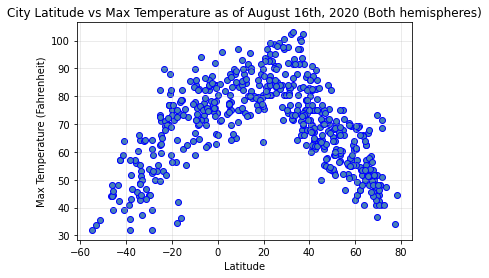

In [11]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Max Temperature as of August 16th, 2020 (Both hemispheres)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and max temp in the y axis
plt.scatter(wdf_clean["Lat"],
           wdf_clean["Max Temp"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

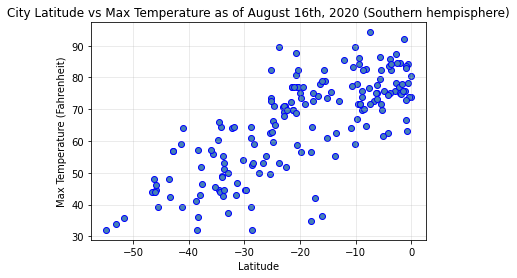

In [12]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Max Temperature as of August 16th, 2020 (Southern hempisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and max temp in the y axis
plt.scatter(south["Lat"],
           south["Max Temp"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

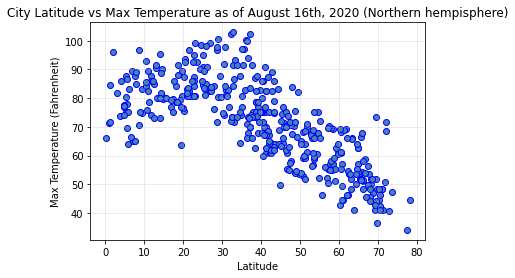

In [13]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Max Temperature as of August 16th, 2020 (Northern hempisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and max temp in the y axis
plt.scatter(north["Lat"],
           north["Max Temp"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

### Observations:
- Note: it's currently summer in the Northern Hemisphere.
- The data seems to form an almost perfect parabola. This gives us a pretty good idea of how weather probably behaves on both hemispheres.
- The Northern Hemisphere is visibly a little hotter in this plot. That makes sense, since it's summer.
- Even if the Northern Hemisphere is in summer season at the moment, the Southern Hemisphere shows a similar behavior during its winter season.
- A safe bet would be to assume that summers are hotter in the Southern Hemisphere than in the Northern Hemisphere, since Southern winter is visibly similar to Northern summer, even when they're opposite seasons.
- Weather around the Equator should stay basically the same throughout the whole year.

## Latitude vs. Humidity Plot

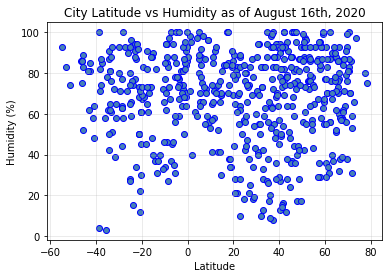

In [14]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Humidity as of August 16th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and humidity in the y axis
plt.scatter(wdf["Lat"],
           wdf["Humidity"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

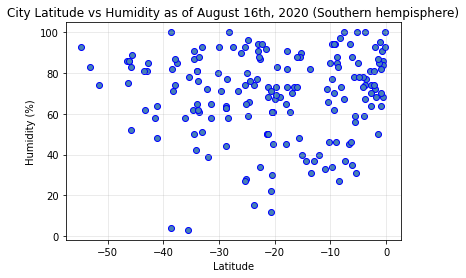

In [15]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Humidity as of August 16th, 2020 (Southern hempisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and humidity in the y axis
plt.scatter(south["Lat"],
           south["Humidity"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

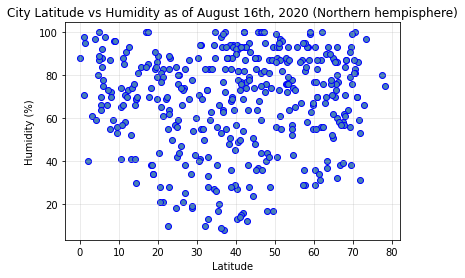

In [16]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Humidity as of August 16th, 2020 (Northern hempisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and humidity in the y axis
plt.scatter(north["Lat"],
           north["Humidity"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

### Observations:
- Note: it's currently summer in the Northern Hemisphere.
- This plot shows no immediate correlation between latitude and humidity,
- That being said, it does at least appear that there is one observation worth mentioning: several cities near both tropics (Cancer and Capricorn) seem to have lower humidity, maybe due to how directly the sun hits those regions.

## Latitude vs. Cloudiness Plot

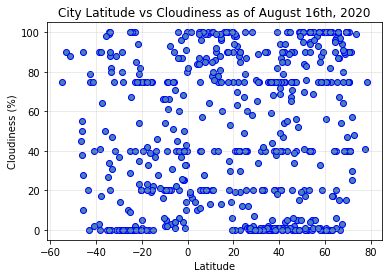

In [17]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Cloudiness as of August 16th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and cloudiness in the y axis
plt.scatter(wdf["Lat"],
           wdf["Cloudiness"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

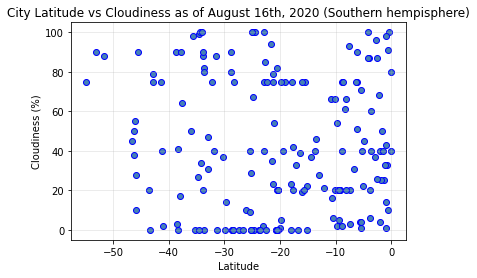

In [18]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Cloudiness as of August 16th, 2020 (Southern hempisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and cloudiness in the y axis
plt.scatter(south["Lat"],
           south["Cloudiness"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

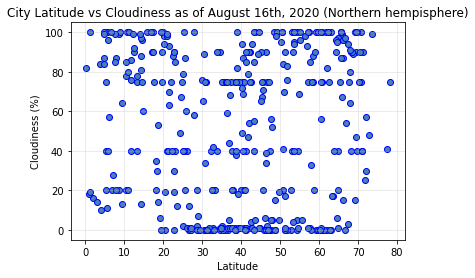

In [19]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Cloudiness as of August 16th, 2020 (Northern hempisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and cloudiness in the y axis
plt.scatter(north["Lat"],
           north["Cloudiness"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

### Observations:
- Note: it's currently summer in the Northern Hemisphere.
- The plots show no obvious sign of correlation between latitude and cloudiness, except for the following observation:
    - Cities near the equator are less prone to clear skies.
- One would think the south has less clouds than the north. However, this can be easily explained by the simple fact that there are more cities from the north than the south in this random dataset.

## Latitude vs. Wind Speed Plot

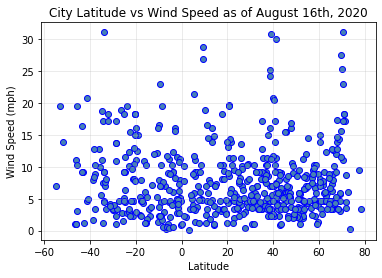

In [20]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Wind Speed as of August 16th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and wind speed in the y axis
plt.scatter(wdf["Lat"],
           wdf["Wind Speed"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

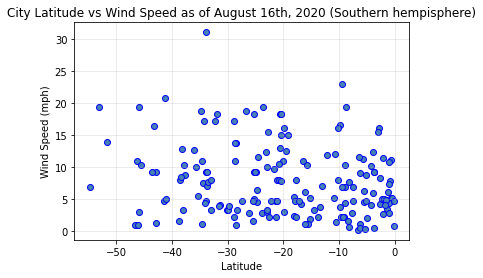

In [21]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Wind Speed as of August 16th, 2020 (Southern hempisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and wind speed in the y axis
plt.scatter(south["Lat"],
           south["Wind Speed"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

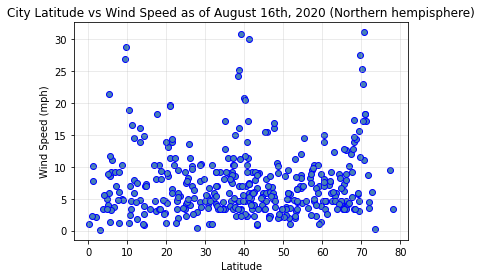

In [22]:
# Setting plot title, axes, and a semi-transparent grid
plt.title("City Latitude vs Wind Speed as of August 16th, 2020 (Northern hempisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)

# Plot data with latitude in the x axis and wind speed in the y axis
plt.scatter(north["Lat"],
           north["Wind Speed"],
           facecolor = "steelblue",
           edgecolor = "blue")
plt.show()

### Observations:
- Note: it's currently summer in the Northern Hemisphere.
- The plots show a slight, but kind of correlation between latitude and wind speed.
- The polar regions seem to have overall slightly higher wind speeds.
- The area near the tropic of Cancer seems to have ever so slightly higher wind speeds than average, but that's normal, since hurricane season is approaching.

## Linear Regression

In [26]:
import scipy.stats as stats

In [40]:
# Linear regression function: will take x and y axis (lists) as parameters
# This function checks for correlation and plots the linear function that
# best describes the trend found in the data provided
def linearRegression(x, y, title):
    # Numpy automatically checks for correlation in data
    correlation_matrix = np.corrcoef(x, y)
    correlation_xy = correlation_matrix[0, 1]
    print("The value of r-squared is", correlation_xy ** 2)
    
    # Scipy takes care of the linear regression, so we only translate it to
    # human-readable text (an equation)
    m, b, _, _, _ = stats.linregress(x, y)
    eq = "y = " + str(round(m, 3)) + "x + " + str(round(b, 3))
    plt.scatter(x, y)
    
    # To plot the line, we multiply the x values by the slope and sum the intersection
    regression = x * m + b
    plt.plot(x, regression, "g-")
    plt.legend(labels = [eq], loc = "best")
    
    # Create folder Plots if it doesn't exist, then save the plot as PNG
    if not os.path.exists("./Plots/"):
        os.mkdir("./Plots/")
    plt.savefig("./Plots/" + title + ".png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is 0.5396903187612706


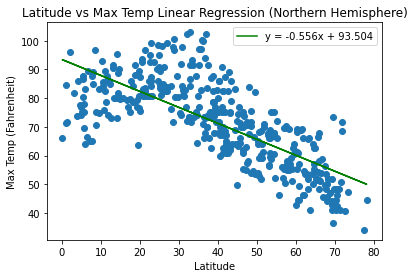

In [42]:
plt.title("Latitude vs Max Temp Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Fahrenheit)")
linearRegression(north["Lat"], north["Max Temp"], "Latitude vs Max Temp Linear Regression (Northern Hemisphere)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is 0.5718899618154475


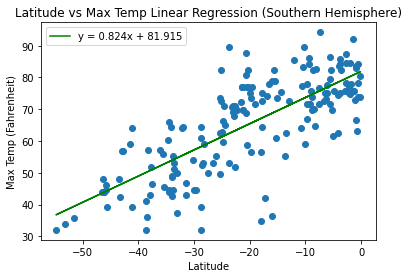

In [43]:
plt.title("Latitude vs Max Temp Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Fahrenheit)")
linearRegression(south["Lat"], south["Max Temp"], "Latitude vs Max Temp Linear Regression (Southern Hemisphere)")

The linear regression confirms our observations above: Temperature rises as we approach the equator and goes down as we approach the polar regions.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is 0.0018193105122988567


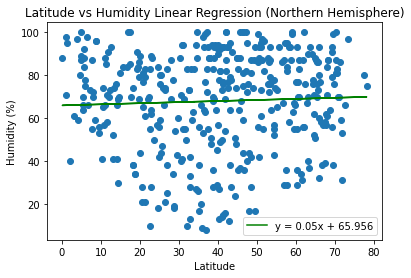

In [44]:
plt.title("Latitude vs Humidity Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linearRegression(north["Lat"], north["Humidity"], "Latitude vs Humidity Linear Regression (Northern Hemisphere)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is 0.00044928893516077277


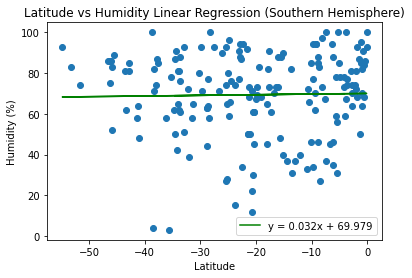

In [45]:
plt.title("Latitude vs Humidity Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linearRegression(south["Lat"], south["Humidity"], "Latitude vs Humidity Linear Regression (Southern Hemisphere)")

The linear regression confirms the observations from above: Humidity has no correlation with latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is 8.05692506604735e-05


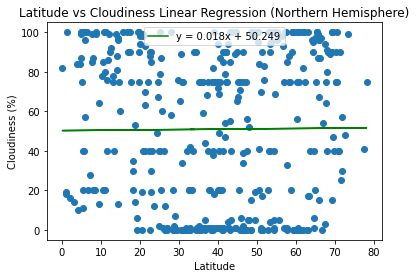

In [46]:
plt.title("Latitude vs Cloudiness Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
linearRegression(north["Lat"], north["Cloudiness"], "Latitude vs Cloudiness Linear Regression (Northern Hemisphere)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is 0.0037736235297747074


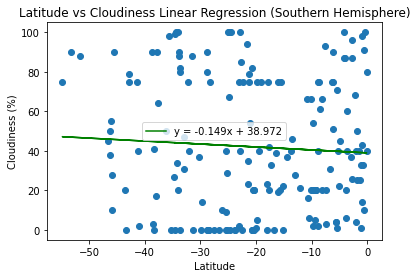

In [47]:
plt.title("Latitude vs Cloudiness Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
linearRegression(south["Lat"], south["Cloudiness"], "Latitude vs Cloudiness Linear Regression (Southern Hemisphere)")

The linear regression confirms the observations from above: Cloudiness has no correlation with latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is 0.0033277172099669887


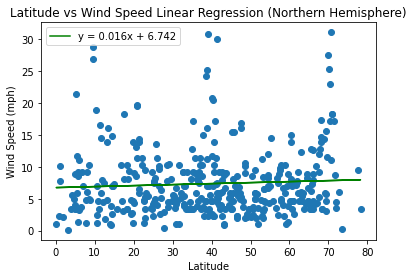

In [48]:
plt.title("Latitude vs Wind Speed Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
linearRegression(north["Lat"], north["Wind Speed"], "Latitude vs Wind Speed Linear Regression (Northern Hemisphere)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is 0.03365492449049537


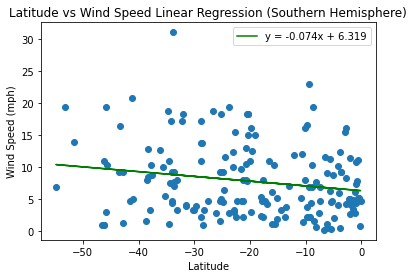

In [49]:
plt.title("Latitude vs Wind Speed Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
linearRegression(south["Lat"], south["Wind Speed"], "Latitude vs Wind Speed Linear Regression (Southern Hemisphere)")

The linear regression confirms the observation from above: there is a weak but visible correlation between latitude and wind speed. While this is not immediately observable on the northern hemisphere plot (because of the other observation -- the tropic of Cancer is approaching its hurricane season, which balances and flattens the slope), it is more noticeable on the southern hemisphere plot.